<a href="https://colab.research.google.com/github/jordanmiracle/parlerdatamine/blob/main/parler_datamine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob

In [ ]:
!wget https://parlertrick.s3-us-west-2.amazonaws.com/data_no_video.tar.gz

--2021-01-26 07:29:38--  https://parlertrick.s3-us-west-2.amazonaws.com/data_no_video.tar.gz
Resolving parlertrick.s3-us-west-2.amazonaws.com (parlertrick.s3-us-west-2.amazonaws.com)... 52.218.213.1
Connecting to parlertrick.s3-us-west-2.amazonaws.com (parlertrick.s3-us-west-2.amazonaws.com)|52.218.213.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9925324800 (9.2G) [application/x-tar]
Saving to: ‘data_no_video.tar.gz’

data_no_video.tar.g 100%[===================>]   9.24G  33.6MB/s    in 4m 42s  

2021-01-26 07:34:20 (33.6 MB/s) - ‘data_no_video.tar.gz’ saved [9925324800/9925324800]



In [ ]:
!tar -xf data_no_video.tar.gz

In [ ]:
files = glob.glob('/content/data_no_video/parler.com/post/*.html')

In [ ]:
files[0]

'/content/data_no_video/parler.com/post/4639194b21404da1bd27552ff118cd5b.html'

In [ ]:
from bs4 import BeautifulSoup

with open(files[0], 'r') as html_doc:
    soup = BeautifulSoup(html_doc, 'html.parser')

In [ ]:
soup

<!DOCTYPE html>

<html prefix="og: https://ogp.me/ns#">
<head>
<title>@Pshill2018 - Pshill2018 - </title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Parleyed on Parler" name="description"/>
<link href="../512ae92f/stylesheets/font.css.html" rel="stylesheet"/>
<link href="../512ae92f/stylesheets/style.css.html" rel="stylesheet">
<link href="../512ae92f/stylesheets/prime.min.css.html" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="website" property="og:type">
<meta content="@Pshill2018 - Pshill2018 - " property="og:title">
<meta content="Parleyed on Parler" property="og:description">
<meta content="/post/4639194b21404da1bd27552ff118cd5b" property="og:url"/>
<meta content="Parler" property="og:site_name"/>
<meta content="summary" name="twitter:card"/>
<meta content="@Pshill2018 - Pshill2018 - " name="twitter:title"/>
<meta content="Parleyed on Parler" name="twitter:description"/>
<meta conten

In [ ]:
# author--name
# author--username
# author--Profile-Photo
# post--text
# post--image
# post-- image
# post--impression
# post--timestampe

In [ ]:
soup.find('span', {'class': 'author--username'})

<span class="author--username">@Private User</span>

In [ ]:
soup.find('span', {'class': 'author--name'})

<span class="author--name">Name Hidden</span>

In [ ]:
soup.find('img', {'alt': 'Post Author Profile Pic'}).get('src', '')

'https://company-media.parler.com/par-default-profile-picture.jpg'

In [ ]:
from tqdm import tqdm

data = []

for idx, file in enumerate(tqdm(files)):
  doc_data = {}
  with open(file, 'r') as html_doc:
    soup = BeautifulSoup(html_doc, 'html.parser')
    
    try:
      author_name = soup.find('span', {'class': 'author--name'}).text
    except AttributeError:
      author_name = ""
    
    try:
      author_username = soup.find('span', {'class': 'author--username'}).text
    except AttributeError:
      author_username = ""

    try: 
      author_profile_picture = soup.find('img', {'alt': 'Post Author Profile Pic'}).get('src', '')
    except AttributeError:
      author_profile_picture = ""
    
    try:
      post_text = soup.find('div', {'class': 'card--body'}).find('p').text
    except AttributeError:
      post_text = ""

    try:
      post_image = soup.find('img', {'class': "mc-image--modal--element"}).get('src', '')
    except AttributeError:
      post_image = ""
    
    try:
      post_timestamp = soup.find('span', {'class': 'post--timestamp'}).text
    except AttributeError:
      post_timestamp = ""

    try:
      post_impressions = soup.find('span', {'class': 'impressions--count'}).text
    except AttributeError:
      post_impressions = ""

    data.append({
        "author_name": author_name,
        "author_username": author_username,
        "author_profile_photo": author_profile_picture,
        "post_text": post_text,
        "post_image": post_image,
        "post_timestamp": post_timestamp,
        "post_impressions": post_impressions
    })
  if idx == 10_000: break


  3%|▎         | 9995/336480 [02:52<1:27:47, 61.98it/s]

In [ ]:
data[0]

{'author_name': 'Name Hidden',
 'author_profile_photo': 'https://company-media.parler.com/par-default-profile-picture.jpg',
 'author_username': '@Private User',
 'post_image': '',
 'post_impressions': '68556',
 'post_text': 'Now we find this on the streets of DC ! Follow me to update you on all the dangers in Washington and echo to warn the others',
 'post_timestamp': '5 days ago'}

In [ ]:
len(data)

10001

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data)

In [ ]:
pd.set_option('display.max_columns', None)
df.head(100)

,author_name,author_username,author_profile_photo,post_text,post_image,post_timestamp,post_impressions,post_tokens
0,Name Hidden,@Private User,https://company-media.parler.com/par-default-p...,Now we find this on the streets of DC ! Follow...,,5 days ago,68556,"[find, streets, dc, follow, update, dangers, w..."
1,Onleadguitar,@Onleadguitar,https://images.parler.com/713aea779d4d48829fa2...,This is a direct violation of Trump’s Executiv...,,4 days ago,40,"[direct, violation, trump, executive, order]"
2,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,ECHO ! APPLY PRESURE . #KENTUCKY #SOUTHDAKOTA ...,,5 days ago,1339,"[echo, apply, presure, kentucky, southdakota, ..."
3,Theresa14837,@Theresa14837,../../images.parler.com/feae46c683534ebfbbeaaa...,The Secretary of State in GA leaked a call he ...,,5 days ago,2811,"[secretary, state, ga, leaked, call, elected, ..."
4,Dinesh D’Souza,@DineshDSouza,../../images.parler.com/fa71563973834b978250a4...,Literally no one can watch this video and conc...,,5 days ago,2645091,"[literally, one, watch, video, conclude, woman..."
...,...,...,...,...,...,...,...,...
95,Flint Bedrock,@flintbedrock,../../images.parler.com/1f45e69f8ed145f9b7b028...,"Fulton County, GA. has BLOCKED The Committee t...",../../api.parler.com/l/xTkMw.html,5 days ago,288425,"[fulton, county, blocked, committee, defend, p..."
96,Nora Becerra,@Noratovornik,../../images.parler.com/38ae0e4f11fd478ea00860...,I feel sick.,,4 days ago,18,"[feel, sick]"
97,Tommy Robinson,@TommyRobinson,../../images.parler.com/fcf0b8932bd540e4a6a7a2...,THE SENATE OF PENNSYLVANIA SENT A LETTER TO MI...,https://api.parler.com/l/0zfIw,5 days ago,207449,"[senate, pennsylvania, sent, letter, mitch, bi..."
98,LLinWood,@linwood,../../images.parler.com/cdd1853c6c6342828b46ad...,,,5 days ago,2060883,[]


In [ ]:
df['author_username'].nunique()

2565

In [ ]:
vals = df.groupby('author_username')['post_text'].apply(list).apply(lambda x: len(x)).values

In [ ]:
import matplotlib.pyplot as plt


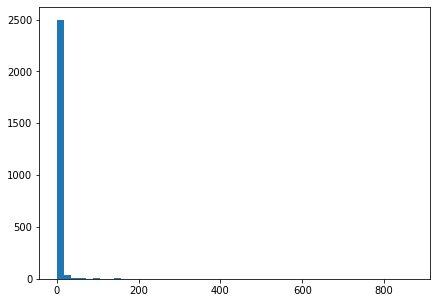

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

ax.hist(vals, bins=50)

fig.show()

In [ ]:
df['post_text']

0        Now we find this on the streets of DC ! Follow...
1        This is a direct violation of Trump’s Executiv...
2        ECHO ! APPLY PRESURE . #KENTUCKY #SOUTHDAKOTA ...
3        The Secretary of State in GA leaked a call he ...
4        Literally no one can watch this video and conc...
                               ...                        
9996     Make this explosive on Parler and follow me be...
9997     Bleeding woman claims she was hit by BLM and t...
9998     I get the distinct feeling that these judges w...
9999     GOP Senators Objecting to Georgia, Pennsylvani...
10000    WHAT OUR PRESIDENT TRUMP HAS DONE ❤️❤️❤️🇺🇸🇺🇸🇺🇸...
Name: post_text, Length: 10001, dtype: object

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
posts = df['post_text'].tolist()

In [ ]:
%%time

keep_tokens = []
for post in posts:
    tokens = nltk.word_tokenize(post)
    keep = []
    for token in tokens:
        word = token.lower()
        if word.isalnum() and word not in nltk.corpus.stopwords.words('english'):
            keep.append(word)
    keep_tokens.append(keep)

CPU times: user 21.8 s, sys: 2.14 s, total: 23.9 s
Wall time: 24 s


In [ ]:
len(keep_tokens)

10001

In [ ]:
df['post_tokens'] = keep_tokens

In [ ]:
import itertools

In [ ]:
list(itertools.chain(*[['a', 'b'], ['b', 'c', 'd']]))

['a', 'b', 'b', 'c', 'd']

In [ ]:
all_tokens = list(itertools.chain(*keep_tokens))

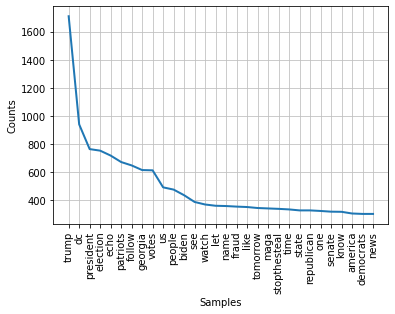

In [ ]:
fd = nltk.FreqDist(all_tokens)
fd.plot(30, cumulative=False)